In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\Desktop\Portfolio\phân tích dịch vụ share xe đạp\dataset2024")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,31D38723D5A8665A,electric_bike,2024-09-26 15:30:58.150,2024-09-26 15:30:59.437,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member
1,67CB39987F4E895B,electric_bike,2024-09-26 15:31:32.529,2024-09-26 15:53:13.501,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member
2,DA61204FD26EC681,electric_bike,2024-09-26 15:00:33.012,2024-09-26 15:02:25.406,NaN,NaN,NaN,NaN,41.90,-87.62,41.90,-87.63,member
3,06F160D46AF235DD,electric_bike,2024-09-26 18:19:06.491,2024-09-26 18:38:53.515,NaN,NaN,NaN,NaN,41.91,-87.63,41.90,-87.62,member
4,6FCA41D4317601EB,electric_bike,2024-09-03 19:49:57.054,2024-09-03 20:07:08.464,NaN,NaN,NaN,NaN,41.90,-87.69,41.90,-87.63,member


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772632 entries, 0 to 1772631
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 175.8+ MB


In [3]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    352500
start_station_id      352500
end_station_name      360111
end_station_id        360111
start_lat                  0
start_lng                  0
end_lat                 1594
end_lng                 1594
member_casual              0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [6]:
# thời gian sử dụng của mỗi chuyến đi
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60 # thời gian sử dụng xe tính theo phút
average_trip_duration = df['trip_duration'].mean() # tính thời gian trung bình sử dụng xe
print(f"Thời gian trung bình của mỗi chuyến đi: {average_trip_duration:.2f} phút")



Thời gian trung bình của mỗi chuyến đi: 15.37 phút


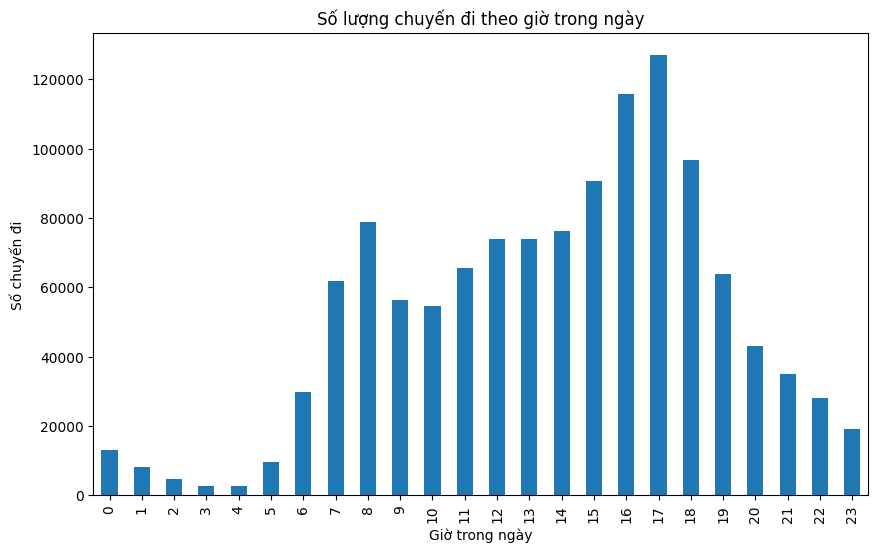

In [7]:
# Thêm cột giờ bắt đầu từ cột 'started_at'
df['hour'] = df['started_at'].dt.hour

# Nhóm dữ liệu theo giờ để đếm số chuyến đi trong mỗi giờ
hourly_usage = df.groupby('hour').size()

# Vẽ biểu đồ để xem giờ cao điểm
hourly_usage.plot(kind='bar', figsize=(10,6), title='Số lượng chuyến đi theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số chuyến đi')
plt.show()

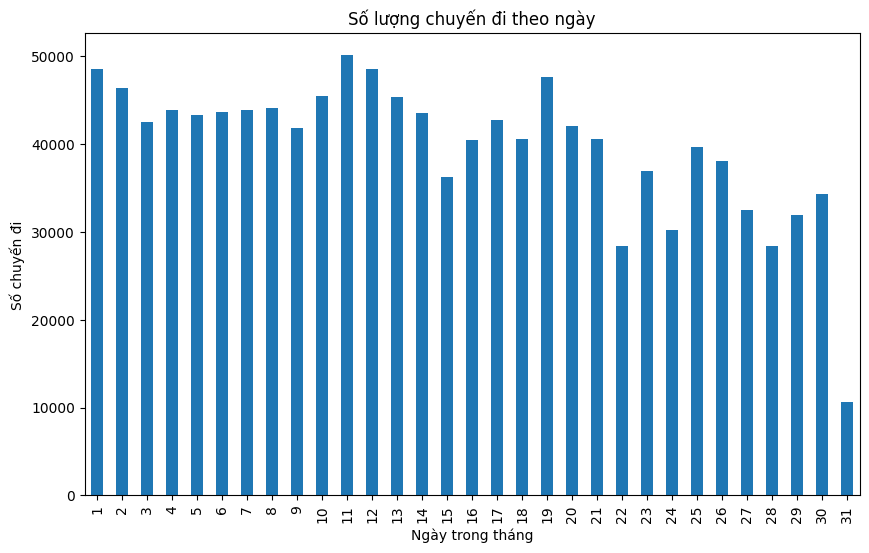

In [8]:
df['day'] = df['started_at'].dt.day
dayly_use = df.groupby('day').size()
dayly_use.plot(kind = 'bar', figsize = (10, 6), title = 'Số lượng chuyến đi theo ngày' )
plt.xlabel("Ngày trong tháng")
plt.ylabel('Số chuyến đi')
plt.show()

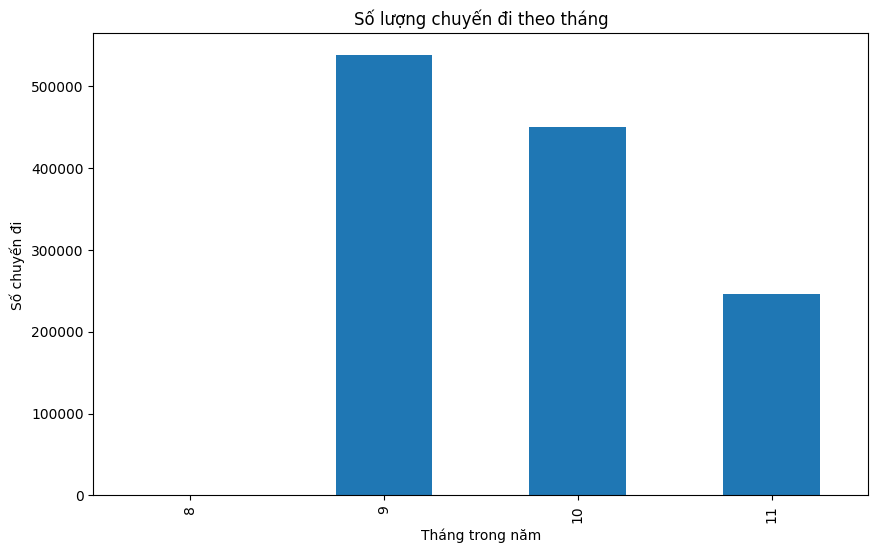

In [9]:
df['month'] = df['started_at'].dt.month
month_use = df.groupby('month').size()
month_use.plot(kind = 'bar', figsize = (10, 6), title = 'Số lượng chuyến đi theo tháng')
plt.xlabel('Tháng trong năm')
plt.ylabel('Số chuyến đi')
plt.show()

In [10]:
member_user = df[df['member_casual'] == 'member']

In [11]:
print(f"thời gian sử dụng trung bình của khách hàng thuộc loại member là {member_user['trip_duration'].mean():.2f} phút")

thời gian sử dụng trung bình của khách hàng thuộc loại member là 11.84 phút


In [12]:
casual_user = df[df['member_casual'] == 'casual']
print(f"thời gian sử dụng trung bình của khách hàng thuộc loại casual là {casual_user['trip_duration'].mean():.2f} phút")

thời gian sử dụng trung bình của khách hàng thuộc loại casual là 21.64 phút


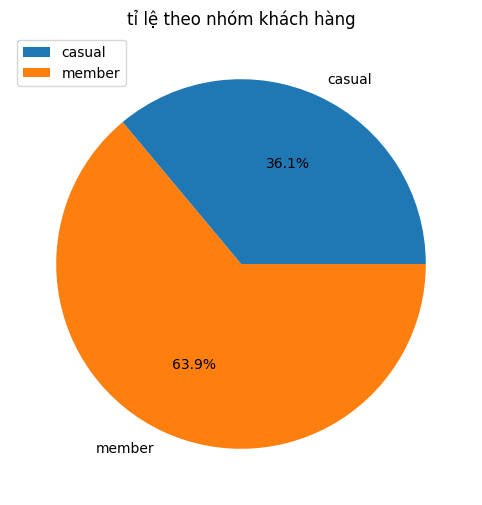

In [13]:
user_group = df.groupby('member_casual').size()
user_group.plot(kind = 'pie' , figsize= (10, 6), title= "tỉ lệ theo nhóm khách hàng", legend=True, autopct='%1.1f%%')
plt.ylabel('')
plt.show()

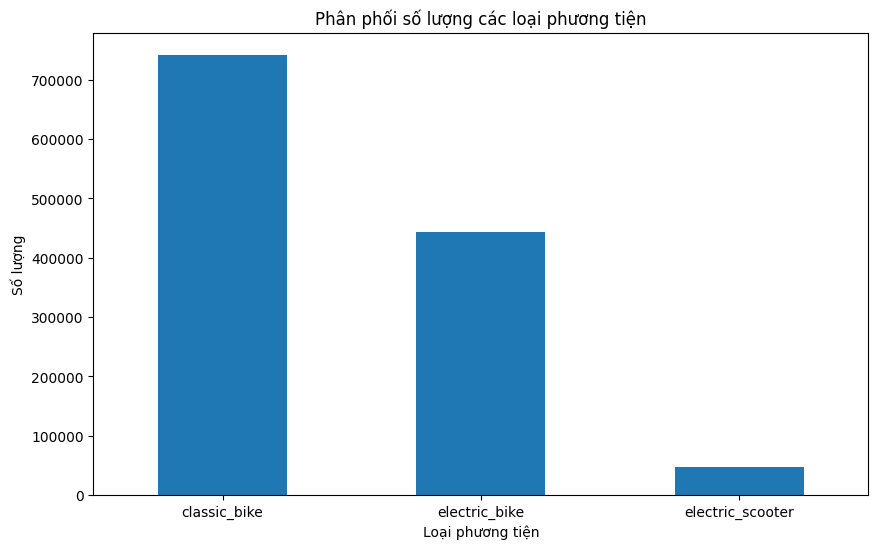

In [14]:
distribution = df['rideable_type'].value_counts()
distribution.plot(kind = 'bar', figsize = (10,6), title = 'Phân phối số lượng các loại phương tiện')
plt.xlabel('Loại phương tiện')
plt.ylabel('Số lượng')
plt.xticks(rotation = 0)
plt.show()

In [15]:
# Chuyển kết quả thành DataFrame bằng unstack
grouped_distribution_table = df.groupby('member_casual')['rideable_type'].value_counts().unstack()
print(grouped_distribution_table)


rideable_type  classic_bike  electric_bike  electric_scooter
member_casual                                               
casual               256995         161765             25740
member               484663         281069             22087


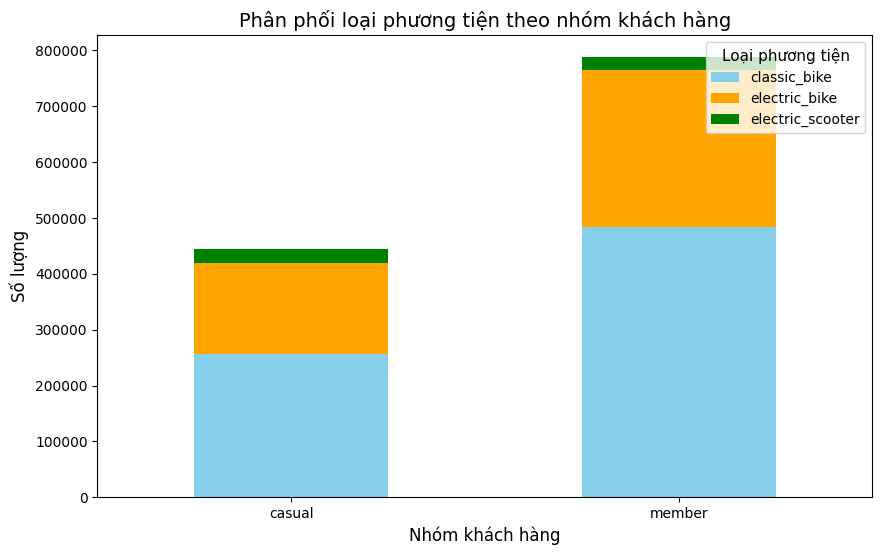

In [16]:
# Vẽ biểu đồ từ DataFrame
ax = grouped_distribution_table.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['skyblue', 'orange', 'green']
)

# Thêm các yếu tố đồ họa
plt.title('Phân phối loại phương tiện theo nhóm khách hàng', fontsize=14)
plt.xlabel('Nhóm khách hàng', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(
    title='Loại phương tiện', 
    fontsize=10, 
    title_fontsize=11, 
    loc='upper right'
)
plt.xticks(rotation=0)
plt.show()


In [17]:
member_grouped = df[df['member_casual'] == 'member']
member_grouped

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,hour,day,month
265,67675BC7F0CE4A7C,electric_bike,2024-09-23 18:07:34.031,2024-09-23 18:27:30.176,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,member,19.935750,18,23,9
753,C9458E7FA8575943,electric_bike,2024-09-30 18:43:45.368,2024-09-30 18:56:19.847,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895634,-87.672069,41.895634,-87.672069,member,12.574650,18,30,9
812,F20B98DA92272826,classic_bike,2024-09-28 16:32:39.886,2024-09-28 16:37:10.267,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member,4.506350,16,28,9
2543,78E397ED8C4DAE73,classic_bike,2024-09-12 22:23:23.668,2024-09-12 22:26:36.512,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,member,3.214067,22,12,9
2844,90B3059DE1B08FD2,electric_bike,2024-09-10 17:40:44.241,2024-09-10 17:56:22.896,Wood St & Chicago Ave,637,California Ave & Milwaukee Ave,13084,41.895569,-87.672064,41.922695,-87.697153,member,15.644250,17,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772627,6F18BF26B4BFBA75,electric_bike,2024-11-21 08:06:58.538,2024-11-21 08:12:14.548,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member,5.266833,8,21,11
1772628,4FC0C36143D89998,electric_bike,2024-11-09 14:51:37.776,2024-11-09 14:55:36.959,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member,3.986383,14,9,11
1772629,8E244ADE5B1653D4,electric_bike,2024-11-23 16:02:26.958,2024-11-23 16:05:25.961,Desplaines St & Kinzie St,TA1306000003,Morgan St & Lake St*,chargingstx4,41.888716,-87.644448,41.885492,-87.652289,member,2.983383,16,23,11
1772630,65F9D9F5648FAC03,electric_bike,2024-11-05 13:30:34.901,2024-11-05 13:40:07.211,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member,9.538500,13,5,11


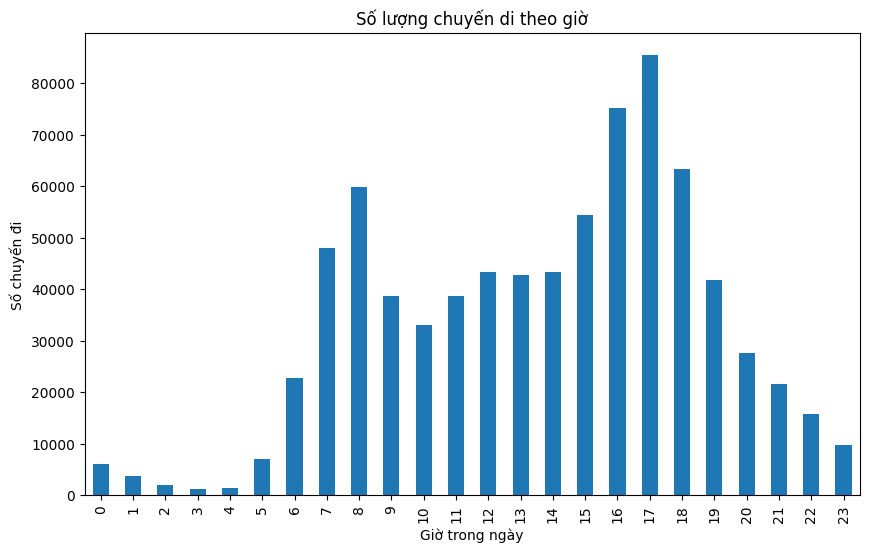

In [18]:
hourly = member_grouped.groupby('hour').size()
hourly.plot(kind = 'bar', figsize= (10, 6), title = 'Số lượng chuyến di theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số chuyến đi')
plt.show()

In [19]:
df['day_of_week'] = df['started_at'].dt.dayofweek
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,hour,day,month,day_of_week
265,67675BC7F0CE4A7C,electric_bike,2024-09-23 18:07:34.031,2024-09-23 18:27:30.176,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,member,19.935750,18,23,9,0
753,C9458E7FA8575943,electric_bike,2024-09-30 18:43:45.368,2024-09-30 18:56:19.847,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895634,-87.672069,41.895634,-87.672069,member,12.574650,18,30,9,0
812,F20B98DA92272826,classic_bike,2024-09-28 16:32:39.886,2024-09-28 16:37:10.267,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member,4.506350,16,28,9,5
1548,81F8597CA066CCCB,classic_bike,2024-09-07 22:49:01.637,2024-09-07 22:59:11.224,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,41.922695,-87.697153,41.903029,-87.697474,casual,10.159783,22,7,9,5
1891,7816A8A3ADC47D37,electric_scooter,2024-09-18 13:31:57.636,2024-09-18 13:32:01.219,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,0.059717,13,18,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772627,6F18BF26B4BFBA75,electric_bike,2024-11-21 08:06:58.538,2024-11-21 08:12:14.548,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member,5.266833,8,21,11,3
1772628,4FC0C36143D89998,electric_bike,2024-11-09 14:51:37.776,2024-11-09 14:55:36.959,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member,3.986383,14,9,11,5
1772629,8E244ADE5B1653D4,electric_bike,2024-11-23 16:02:26.958,2024-11-23 16:05:25.961,Desplaines St & Kinzie St,TA1306000003,Morgan St & Lake St*,chargingstx4,41.888716,-87.644448,41.885492,-87.652289,member,2.983383,16,23,11,5
1772630,65F9D9F5648FAC03,electric_bike,2024-11-05 13:30:34.901,2024-11-05 13:40:07.211,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member,9.538500,13,5,11,1


In [20]:
daily_usage = df.groupby(['day_of_week', 'member_casual'])['trip_duration'].sum().unstack()
daily_usage

member_casual,casual,member
day_of_week,,
0,1.236744e+06,1.342752e+06
1,8.423693e+05,1.390009e+06
2,9.498514e+05,1.519248e+06
3,9.787257e+05,1.397445e+06
4,1.327244e+06,1.307425e+06
5,2.126998e+06,1.222161e+06
6,2.157504e+06,1.146235e+06


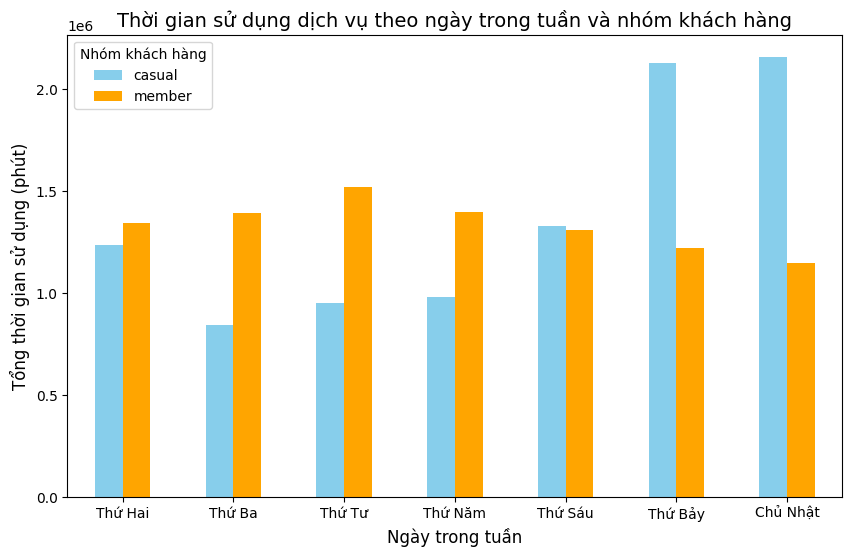

In [21]:
# Vẽ biểu đồ cột cho tổng thời gian sử dụng theo từng ngày trong tuần và nhóm khách hàng
daily_usage.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange'])

# Thêm tiêu đề và nhãn
plt.title('Thời gian sử dụng dịch vụ theo ngày trong tuần và nhóm khách hàng', fontsize=14)
plt.xlabel('Ngày trong tuần', fontsize=12)
plt.ylabel('Tổng thời gian sử dụng (phút)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật'], rotation=0)
plt.legend(title='Nhóm khách hàng', fontsize=10)
plt.show()


In [22]:
casual_grouped = df[df['member_casual'] == 'casual']
casual_grouped

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,hour,day,month,day_of_week
1548,81F8597CA066CCCB,classic_bike,2024-09-07 22:49:01.637,2024-09-07 22:59:11.224,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,41.922695,-87.697153,41.903029,-87.697474,casual,10.159783,22,7,9,5
1891,7816A8A3ADC47D37,electric_scooter,2024-09-18 13:31:57.636,2024-09-18 13:32:01.219,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,0.059717,13,18,9,2
3646,8D4F225AFFE05F56,classic_bike,2024-09-18 16:27:04.925,2024-09-18 17:09:15.430,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,42.175083,16,18,9,2
4524,68D6304E0CD315E2,classic_bike,2024-09-25 14:29:36.365,2024-09-25 14:32:24.448,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,2.801383,14,25,9,2
4525,DBD80C530583A109,electric_bike,2024-09-25 14:34:26.738,2024-09-25 14:54:41.134,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,20.239933,14,25,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772591,78E94B1D9F77E153,classic_bike,2024-11-25 09:18:39.813,2024-11-25 09:36:24.291,St. Clair St & Erie St,13016,Morgan St & Lake St*,chargingstx4,41.894345,-87.622798,41.885492,-87.652289,casual,17.741300,9,25,11,0
1772595,420262696A3957AC,electric_bike,2024-11-08 08:12:49.340,2024-11-08 08:29:24.057,California Ave & North Ave,13258,LaSalle St & Washington St,13006,41.910044,-87.697167,41.882664,-87.632530,casual,16.578617,8,8,11,4
1772601,C004F3CDA62D8444,electric_bike,2024-11-08 16:47:00.442,2024-11-08 16:51:10.564,Aberdeen St & Randolph St,18062,Racine Ave & Congress Pkwy,TA1306000025,41.884114,-87.654264,41.874640,-87.657030,casual,4.168700,16,8,11,4
1772619,18FB1A15F4EA185D,electric_bike,2024-11-13 11:56:28.898,2024-11-13 11:59:34.772,Morgan St & Pershing Rd,16933,Ashland Ave & Pershing Rd,16932,41.823613,-87.650931,41.823465,-87.665577,casual,3.097900,11,13,11,2


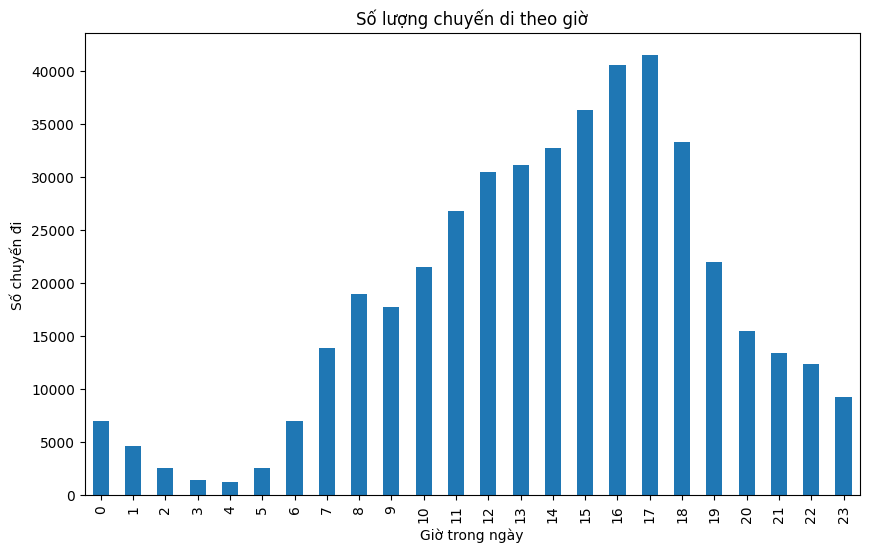

In [23]:
hourly = casual_grouped.groupby('hour').size()
hourly.plot(kind = 'bar', figsize= (10, 6), title = 'Số lượng chuyến di theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số chuyến đi')
plt.show()

In [24]:


# Bán kính Trái Đất (km)
R = 6371  

# Hàm tính khoảng cách theo công thức Haversine
def haversine(lat1, lng1, lat2, lng2):
    # Chuyển đổi tọa độ từ độ sang radian
    lat1, lng1, lat2, lng2 = map(np.radians, [lat1, lng1, lat2, lng2])
    
    # Tính hiệu vĩ độ và kinh độ
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    
    # Áp dụng công thức Haversine
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c  # Khoảng cách (km)

# Tính khoảng cách cho từng chuyến đi
df['distance_km'] = haversine(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

# Kiểm tra kết quả
print(df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance_km']].head())


      start_lat  start_lng    end_lat    end_lng  distance_km
265   41.903029 -87.697474  41.903029 -87.697474     0.000000
753   41.895634 -87.672069  41.895634 -87.672069     0.000000
812   41.922695 -87.697153  41.922695 -87.697153     0.000000
1548  41.922695 -87.697153  41.903029 -87.697474     2.186921
1891  41.922695 -87.697153  41.922695 -87.697153     0.000000


In [25]:
# Tính khoảng cách trung bình theo nhóm khách hàng
average_distance = df.groupby('member_casual')['distance_km'].mean()

# In kết quả
print(average_distance)


member_casual
casual    2.074929
member    2.074120
Name: distance_km, dtype: float64


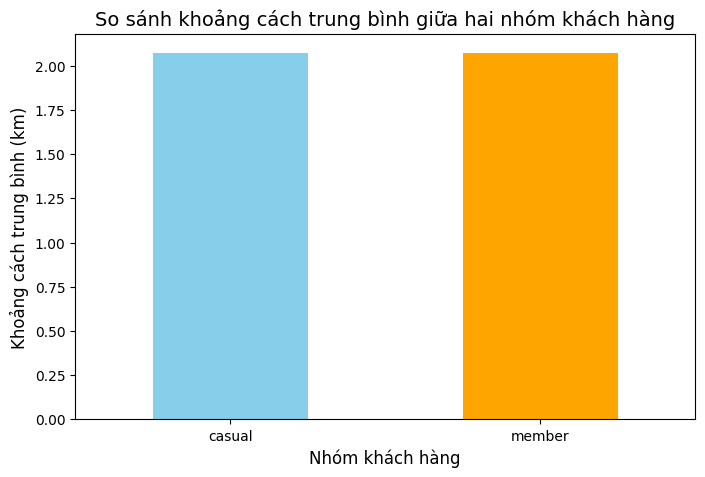

In [26]:
# Vẽ biểu đồ
average_distance.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 5))

# Thêm tiêu đề và nhãn
plt.title('So sánh khoảng cách trung bình giữa hai nhóm khách hàng', fontsize=14)
plt.xlabel('Nhóm khách hàng', fontsize=12)
plt.ylabel('Khoảng cách trung bình (km)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [27]:
# Lọc ra các cột tọa độ
location_data = df[['start_lat', 'start_lng']].dropna()

# Kiểm tra dữ liệu
print(location_data.head())


      start_lat  start_lng
265   41.903029 -87.697474
753   41.895634 -87.672069
812   41.922695 -87.697153
1548  41.922695 -87.697153
1891  41.922695 -87.697153


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [33]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
location_scaled = scaler.fit_transform(location_data)

# Áp dụng thuật toán KMeans
num_clusters = 5  # Số cụm mong muốn
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Thực hiện phân cụm và thêm cột cluster vào bản sao của location_data
clusters = kmeans.fit_predict(location_scaled)
location_data_with_clusters = location_data.copy()
location_data_with_clusters['cluster'] = clusters

# Kiểm tra kết quả
print(location_data_with_clusters['cluster'].value_counts())


cluster
0    712031
3    282056
1    152800
4     82000
2      3432
Name: count, dtype: int64


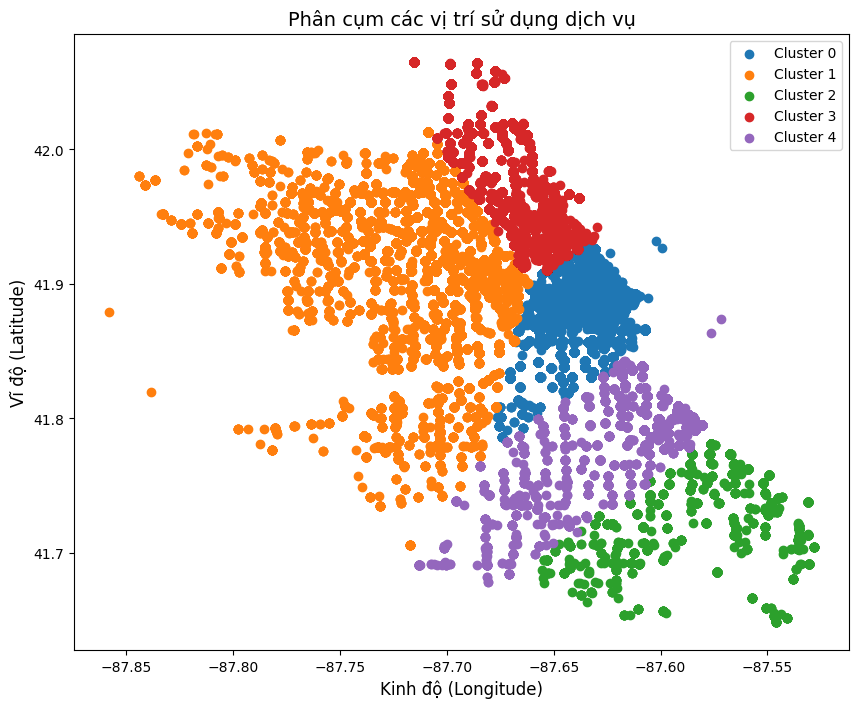

In [34]:
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    clustered_data = location_data_with_clusters[location_data_with_clusters['cluster'] == cluster]
    plt.scatter(clustered_data['start_lng'], clustered_data['start_lat'], label=f'Cluster {cluster}')

plt.title('Phân cụm các vị trí sử dụng dịch vụ', fontsize=14)
plt.xlabel('Kinh độ (Longitude)', fontsize=12)
plt.ylabel('Vĩ độ (Latitude)', fontsize=12)
plt.legend()
plt.show()
